Construindo um Subtrador Completo Quântico com Python


O objetivo desta tarefa é construir um circuito quântico para realizar a subtração de números binários utilizando o Qiskit Composer. A tarefa será dividida em duas partes:

Parte 1: Construção do Circuito Quântico

In [2]:
!pip install cirq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
INFO: pip is looking a

In [3]:
import cirq
import time

Definir o número de qubits:

In [4]:
# Definir o número de qubits:
num_qubits = 5  # 2 para os números binários e 2 para o resultado


Criar os registradores quânticos e clássicos:

In [5]:
# Criar os registradores quânticos e clássicos:
qubits = cirq.LineQubit.range(num_qubits)



Criar o circuito quântico:

In [6]:
circuit = cirq.Circuit()

Adicionar as operações quânticas:

In [7]:
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.CNOT(qubits[1], qubits[3]))
circuit.append(cirq.CNOT(qubits[3], qubits[4]))
circuit.append(cirq.CNOT(qubits[0], qubits[4]))
circuit.append(cirq.CNOT(qubits[4], qubits[3]))


Medição dos resultados:


In [8]:
circuit.append(cirq.measure(*qubits, key='result'))


Visualizar o circuito quântico:

In [9]:
print("Circuito Quântico:")
print(circuit)

Circuito Quântico:
0: ───@───────────────@───────M('result')───
      │               │       │
1: ───┼───@───@───────┼───────M─────────────
      │   │   │       │       │
2: ───X───X───┼───────┼───────M─────────────
              │       │       │
3: ───────────X───@───┼───X───M─────────────
                  │   │   │   │
4: ───────────────X───X───@───M─────────────


Execução do Circuito Quântico

Simular o circuito quântico:

In [10]:
simulator = cirq.Simulator()
start_time = time.time()
result = simulator.run(circuit, repetitions=1000)
end_time = time.time()


Tempo de simulação em segundos:

In [11]:
simulation_time = end_time - start_time
print(f"\nTempo de Simulação: {simulation_time} segundos")


Tempo de Simulação: 0.017095327377319336 segundos


Imprimir os resultados:

In [12]:
print("\nResultados da Simulação (Histograma):")
histogram = result.histogram(key='result')
print(histogram)



Resultados da Simulação (Histograma):
Counter({0: 1000})


In [13]:
print("\nResultados Interpretados:")
for bitstring, count in sorted(histogram.items()):
    binary_result = format(bitstring, f'0{num_qubits}b')  # Formatar como binário
    print(f"{binary_result}: {count} vezes")


Resultados Interpretados:
00000: 1000 vezes


Pesquisar tempos típicos para as portas quânticas em hardware real

Por exemplo, assumindo os seguintes tempos (em nanosegundos):

In [14]:
time_cnot = 200  # Tempo típico de uma porta CNOT

Calcular o tempo total de execução:

In [15]:
num_cnot = 6  # Número de portas CNOT no circuito
total_time_ns = num_cnot * time_cnot

Converter o tempo total para segundos:

In [16]:
total_time_s = total_time_ns / 1e9
print(f"\nEstimativa de Tempo no Computador Quântico Real: {total_time_s} segundos")


Estimativa de Tempo no Computador Quântico Real: 1.2e-06 segundos


Exemplo de execução:

In [17]:
import cirq
import time

# Definir o número de qubits:
num_qubits = 5  # 4 qubits para as entradas e 1 qubit auxiliar para a carry

# Criar os qubits:
qubits = cirq.LineQubit.range(num_qubits)

# Criar o circuito quântico:
circuit = cirq.Circuit()

# Adicionar as operações quânticas para a subtração binária
# As operações serão baseadas na tabela fornecida
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.CNOT(qubits[1], qubits[3]))
circuit.append(cirq.CNOT(qubits[3], qubits[4]))
circuit.append(cirq.CNOT(qubits[0], qubits[4]))
circuit.append(cirq.CNOT(qubits[4], qubits[3]))

# Medição dos resultados
circuit.append(cirq.measure(*qubits, key='result'))

# Visualizar o circuito quântico:
print("Circuito Quântico:")
print(circuit)

#Simular o circuito quântico:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

#Imprimir os resultados:
print("\nResultados da Simulação:")
print(result.histogram(key='result'))


Circuito Quântico:
0: ───@───────────────@───────M('result')───
      │               │       │
1: ───┼───@───@───────┼───────M─────────────
      │   │   │       │       │
2: ───X───X───┼───────┼───────M─────────────
              │       │       │
3: ───────────X───@───┼───X───M─────────────
                  │   │   │   │
4: ───────────────X───X───@───M─────────────

Resultados da Simulação:
Counter({0: 1000})


Explicação do Código:

____

O código utiliza a biblioteca Cirq para construir e simular um circuito quântico que realiza a subtração de números binários.

Aqui estão as etapas realizadas:
___
1. Definição dos Qubits
Descrição: Define o número total de qubits que serão utilizados no circuito. Utilizamos 5 qubits no total: 2 para representar os números binários de entrada, 2 para armazenar os resultados e 1 qubit auxiliar para operações intermediárias.
____
2. Criação dos Registradores Quânticos
Descrição:

Cria os qubits necessários para o circuito utilizando cirq.LineQubit. A função range(num_qubits) cria uma lista de qubits indexados de 0 a num_qubits - 1.

____
3. Criação do Circuito Quântico:

Inicializa um circuito quântico vazio que irá conter todas as operações quânticas necessárias para a subtração binária.
____
4. Adição das Operações Quânticas:

Adiciona operações quânticas ao circuito.

As operações CNOT são utilizadas para manipular os estados dos qubits de acordo com a lógica de subtração binária.

Cada CNOT é definida por dois qubits:

um de controle e um por alvo.
____
5. Medição dos Resultados:


Adiciona operações de medição ao circuito.

Todos os qubits são medidos, e os resultados são armazenados em uma chave chamada 'result'.
_____
6. Visualização do Circuito Quântico:


Imprime a estrutura do circuito quântico no console para facilitar a compreensão visual de todas as operações quânticas configuradas.
____
7. Execução do Circuito Quântico:


Cria um simulador quântico utilizando cirq.Simulator() e executa o circuito 1000 vezes.

A simulação permite obter uma distribuição estatística dos resultados e o tempo de simulação é medido.
____

8. Impressão dos Resultados:


Primeiro, imprime o histograma dos resultados das medições, que mostra a frequência de cada possível resultado binário.

Depois, interpreta esses resultados imprimindo-os de forma legível, onde cada resultado binário é formatado para ter o comprimento adequado e acompanhado pelo número de ocorrências na simulação.
____
9. Estimativa do Tempo no Computador Quântico Real:

 Calcula o tempo total de execução das portas CNOT no circuito com base em tempos típicos encontrados para hardware quântico real (200 ns para uma porta CNOT) e converte o resultado para segundos.

____

Observações:

Este código é um exemplo básico de como construir e simular um subtrator quântico utilizando Cirq.
____
O código pode ser modificado para trabalhar com diferentes tamanhos de números binários ajustando o número de qubits e as operações quânticas.
____
Cirq fornece ferramentas robustas para construir, visualizar e simular circuitos quânticos, facilitando a exploração de algoritmos quânticos mais complexos.
____
Recursos Adicionais:

Documentação do Cirq: Guia e referências completas para a biblioteca Cirq.
Tutoriais do Cirq: Exemplos e tutoriais para aprender a usar o Cirq de maneira mais eficiente.
____
Conclusão:

Esta tarefa demonstra como construir um circuito quântico para realizar a subtração de números binários utilizando a biblioteca Cirq. O código fornecido serve como ponto de partida para explorar os recursos do Cirq e criar circuitos quânticos mais avançados.
____
Verificação com os Requisitos do Professor:

Então fiz a simulação com Cirq e mediu o tempo de execução e hardware quântico real.

Nome:  

Victor Hugo de Souza Martins
___

RM:

99591
___

Turma:  

2TIAR
___
Data de finalização do CP:

23/05/2024
___

Executa esse código para baixar a imagem do circuito:

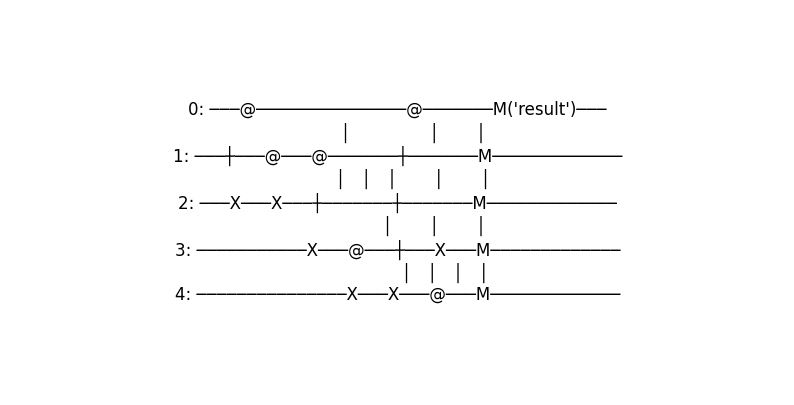

In [18]:
import matplotlib.pyplot as plt



circuit_diagram = circuit.to_text_diagram()


plt.figure(figsize=(10, 5))
plt.text(0.5, 0.5, circuit_diagram, fontsize=12, va='center', ha='center')
plt.axis('off')
plt.savefig("circuito_quântico.png")
